# EDA

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Load Data

In [2]:
train = pd.read_csv("../train.csv",index_col = "Id")
test = pd.read_csv("../test.csv", index_col = "Id")
print(train.shape)
print(train.columns)

(1460, 80)
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Paved

In [3]:
# Change Year and Month to categorical variables
train[['YearBuilt', 'YearRemodAdd','MoSold', 'YrSold','GarageYrBlt']] = \
    train[['YearBuilt', 'YearRemodAdd','MoSold', 'YrSold','GarageYrBlt']].astype("category")

In [4]:
train.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


## Target Variable: Sale Price

Text(0.5, 1.0, 'Density plot Logged Sale Price')

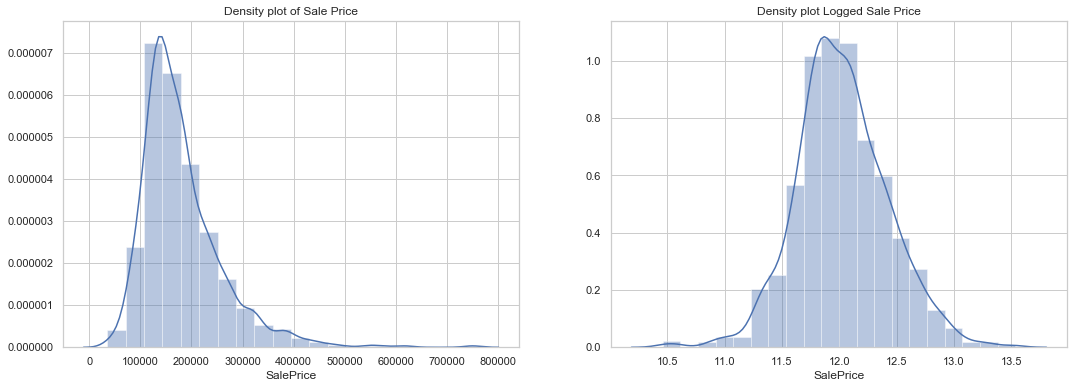

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.distplot(train["SalePrice"],bins=20, ax= ax[0])
ax[0].set_title("Density plot of Sale Price")

# To make the distribution of the target variable normal, I applied the log transformation.
lsalesprice = train["SalePrice"].apply(np.log)
sns.distplot(lsalesprice, bins = 20, ax= ax[1])
ax[1].set_title("Density plot Logged Sale Price")

## 10 critical factors in house value based upon research

* Peer-reviewed scholarly journal: https://link.springer.com/article/10.1007/s11146-006-9983-5<br>
* Opendoor blog post: https://www.opendoor.com/w/blog/factors-that-influence-home-value 


The Below are the lists of features related to each of the critical factors 

* Sq-Foot : BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF LowQualFinSF WoodDeckSF OpenPorchSF GrLivArea EnclosedPorch 3SsnPorch ScreenPorch MasVnrArea
* Lot Size: LotFrontage LotArea LotShape LotConfig
* Age: YearBuilt YrSold
* Bed and Bathroom: BedroomAbvGr BsmtFullBath BsmtHalfBath FullBath HalfBath TotRmsAbvGrd
* Garage: GarageType GarageFinish GarageYrBlt GarageCars GarageArea GarageQual GarageCond
* Pools: PoolArea PoolQC
* Fireplace: Fireplaces FireplaceQu
* Air-conditioning: CentralAir
* Upgrades/updates: YearRemodAdd
* Neighborhood/Location: Neighborhood

In [6]:
# Important features included in 10 most critical factors listed above
imp_cols = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","WoodDeckSF",
            "OpenPorchSF","GrLivArea","EnclosedPorch","3SsnPorch","ScreenPorch","MasVnrArea","LotFrontage",
            "LotArea","LotShape","LotConfig","YearBuilt","YrSold","BedroomAbvGr","BsmtFullBath","BsmtHalfBath",
            "FullBath","HalfBath","TotRmsAbvGrd","GarageType","GarageFinish","GarageYrBlt","GarageCars","GarageArea",
            "GarageQual","GarageCond","PoolArea","PoolQC","Fireplaces","FireplaceQu","CentralAir","YearRemodAdd",
            "Neighborhood"]

In [7]:
# Descriptive Statistics of the numerical features from the list of critical factors
train[imp_cols].describe()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,WoodDeckSF,OpenPorchSF,GrLivArea,EnclosedPorch,3SsnPorch,ScreenPorch,MasVnrArea,LotFrontage,LotArea,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,GarageCars,GarageArea,PoolArea,Fireplaces
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,94.244521,46.660274,1515.463699,21.954110,3.409589,15.060959,103.685262,70.049958,10516.828082,2.866438,0.425342,0.057534,1.565068,0.382877,6.517808,1.767123,472.980137,2.758904,0.613014
std,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,125.338794,66.256028,525.480383,61.119149,29.317331,55.757415,181.066207,24.284752,9981.264932,0.815778,0.518911,0.238753,0.550916,0.502885,1.625393,0.747315,213.804841,40.177307,0.644666
min,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,0.000000,0.000000,59.000000,7553.500000,2.000000,0.000000,0.000000,1.000000,0.000000,5.000000,1.000000,334.500000,0.000000,0.000000
50%,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,0.000000,25.000000,1464.000000,0.000000,0.000000,0.000000,0.000000,69.000000,9478.500000,3.000000,0.000000,0.000000,2.000000,0.000000,6.000000,2.000000,480.000000,0.000000,1.000000
75%,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,168.000000,68.000000,1776.750000,0.000000,0.000000,0.000000,166.000000,80.000000,11601.500000,3.000000,1.000000,0.000000,2.000000,1.000000,7.000000,2.000000,576.000000,0.000000,1.000000
max,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,857.000000,547.000000,5642.000000,552.000000,508.000000,480.000000,1600.000000,313.000000,215245.000000,8.000000,3.000000,2.000000,3.000000,2.000000,14.000000,4.000000,1418.000000,738.000000,3.000000


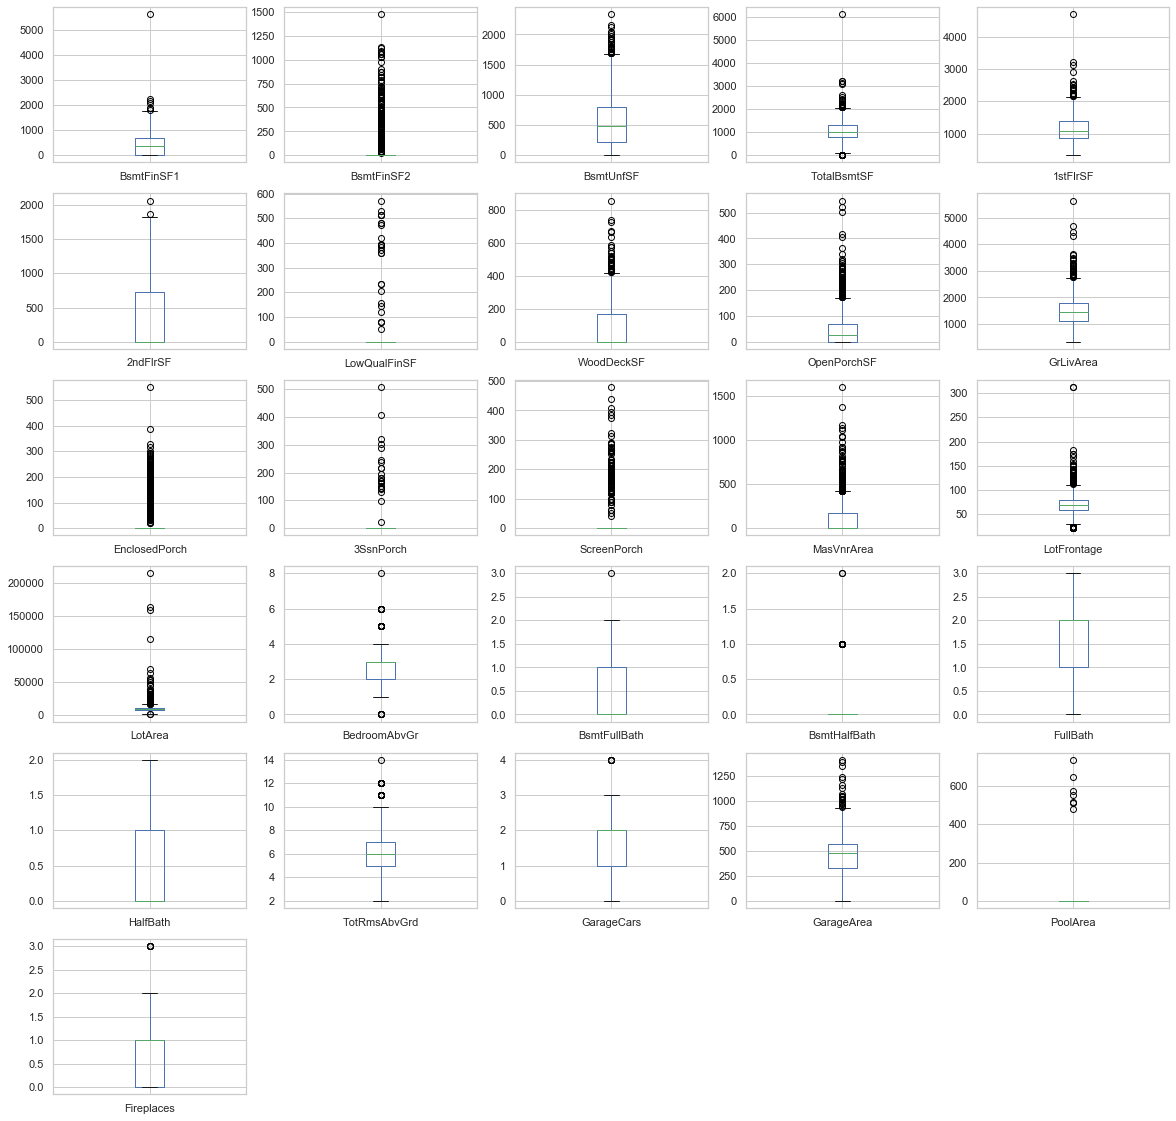

In [8]:
# Boxplots of the numerical features from the list of critical factors
train[imp_cols].plot(kind = "box", subplots = True, sharex = False, sharey = False, layout = (6,5), figsize=(20,20));

In [9]:
# Categorical features among the critical Factors 
cat_imp_cols = train[imp_cols].select_dtypes(["object","category"]).columns.tolist()

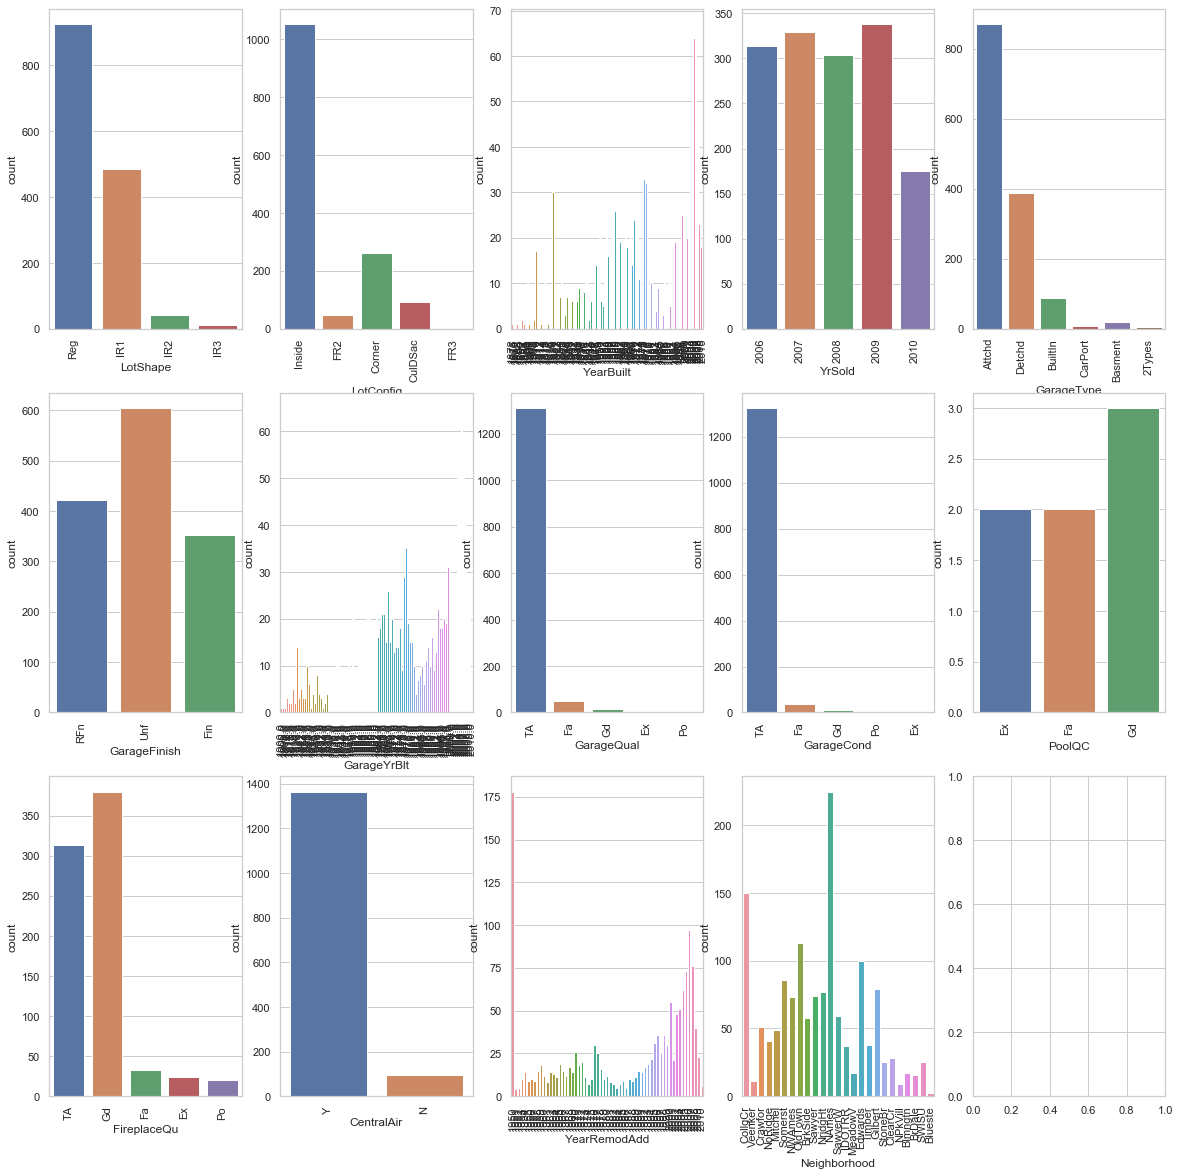

In [10]:
# Countplots of the categorical features from the list of critical factors
fig, ax = plt.subplots(3, 5, figsize=(20, 20))
for col, subplot in zip(cat_imp_cols, ax.flatten()):
    sns.countplot(train[col], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

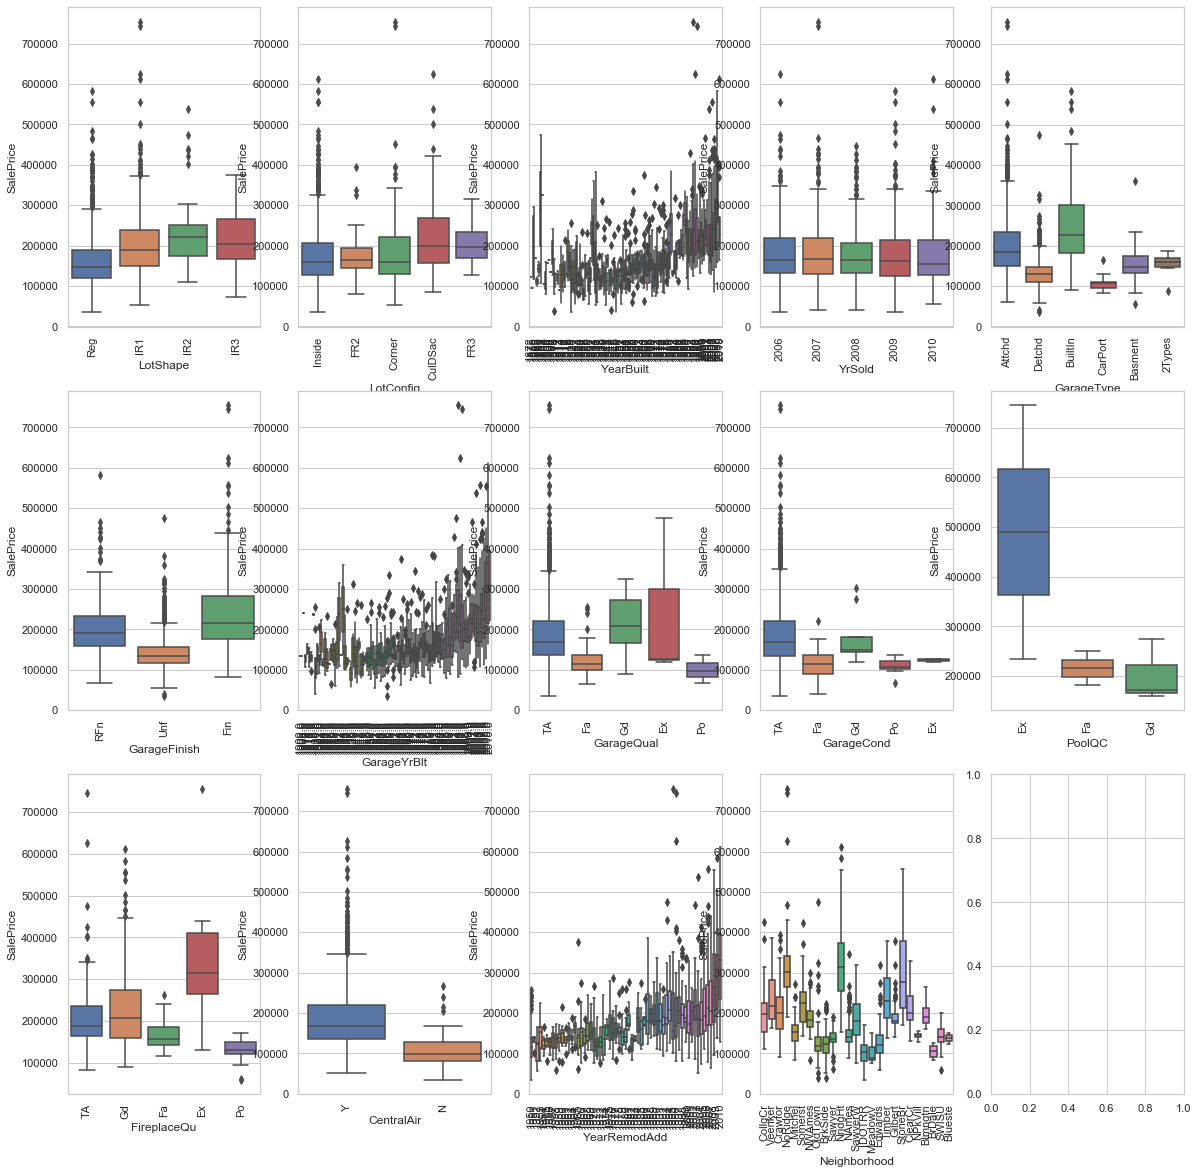

In [11]:
# Boxplots of the categorical features from the list of critical factors
fig, ax = plt.subplots(3, 5, figsize=(20, 20))
for col, subplot in zip(cat_imp_cols, ax.flatten()):
    sns.boxplot(data = train,x = col, y = "SalePrice", ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [12]:
# In 2010, samples were only collected till July
train[train['YrSold'] == 2010].groupby('MoSold')['YrSold'].size()

MoSold
1     10
2     15
3     21
4     39
5     48
6     36
7      6
8      0
9      0
10     0
11     0
12     0
Name: YrSold, dtype: int64

## Features that are not from the 10 critical factors

In [13]:
# Features that are not included in the 10 most critical factors
unimp_cols = [col for col in train.columns.tolist() if col not in imp_cols]
unimp_cols = unimp_cols[:-1] #exclude SalePrice
unimp_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'SaleType',
 'SaleCondition']

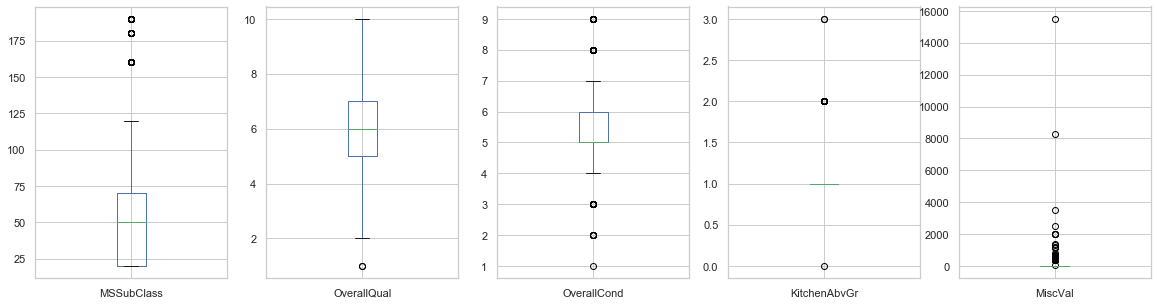

In [14]:
# Boxplots of the numerical features from the list of non-critical factors
train[unimp_cols].plot(kind = "box", subplots = True, sharex = False, sharey = False, 
                       layout = (1,5), figsize=(20,5));

In [15]:
# Categorical features among the non-critical Factors 
cat_unimp_cols = train[unimp_cols].select_dtypes(["object","category"]).columns.tolist()

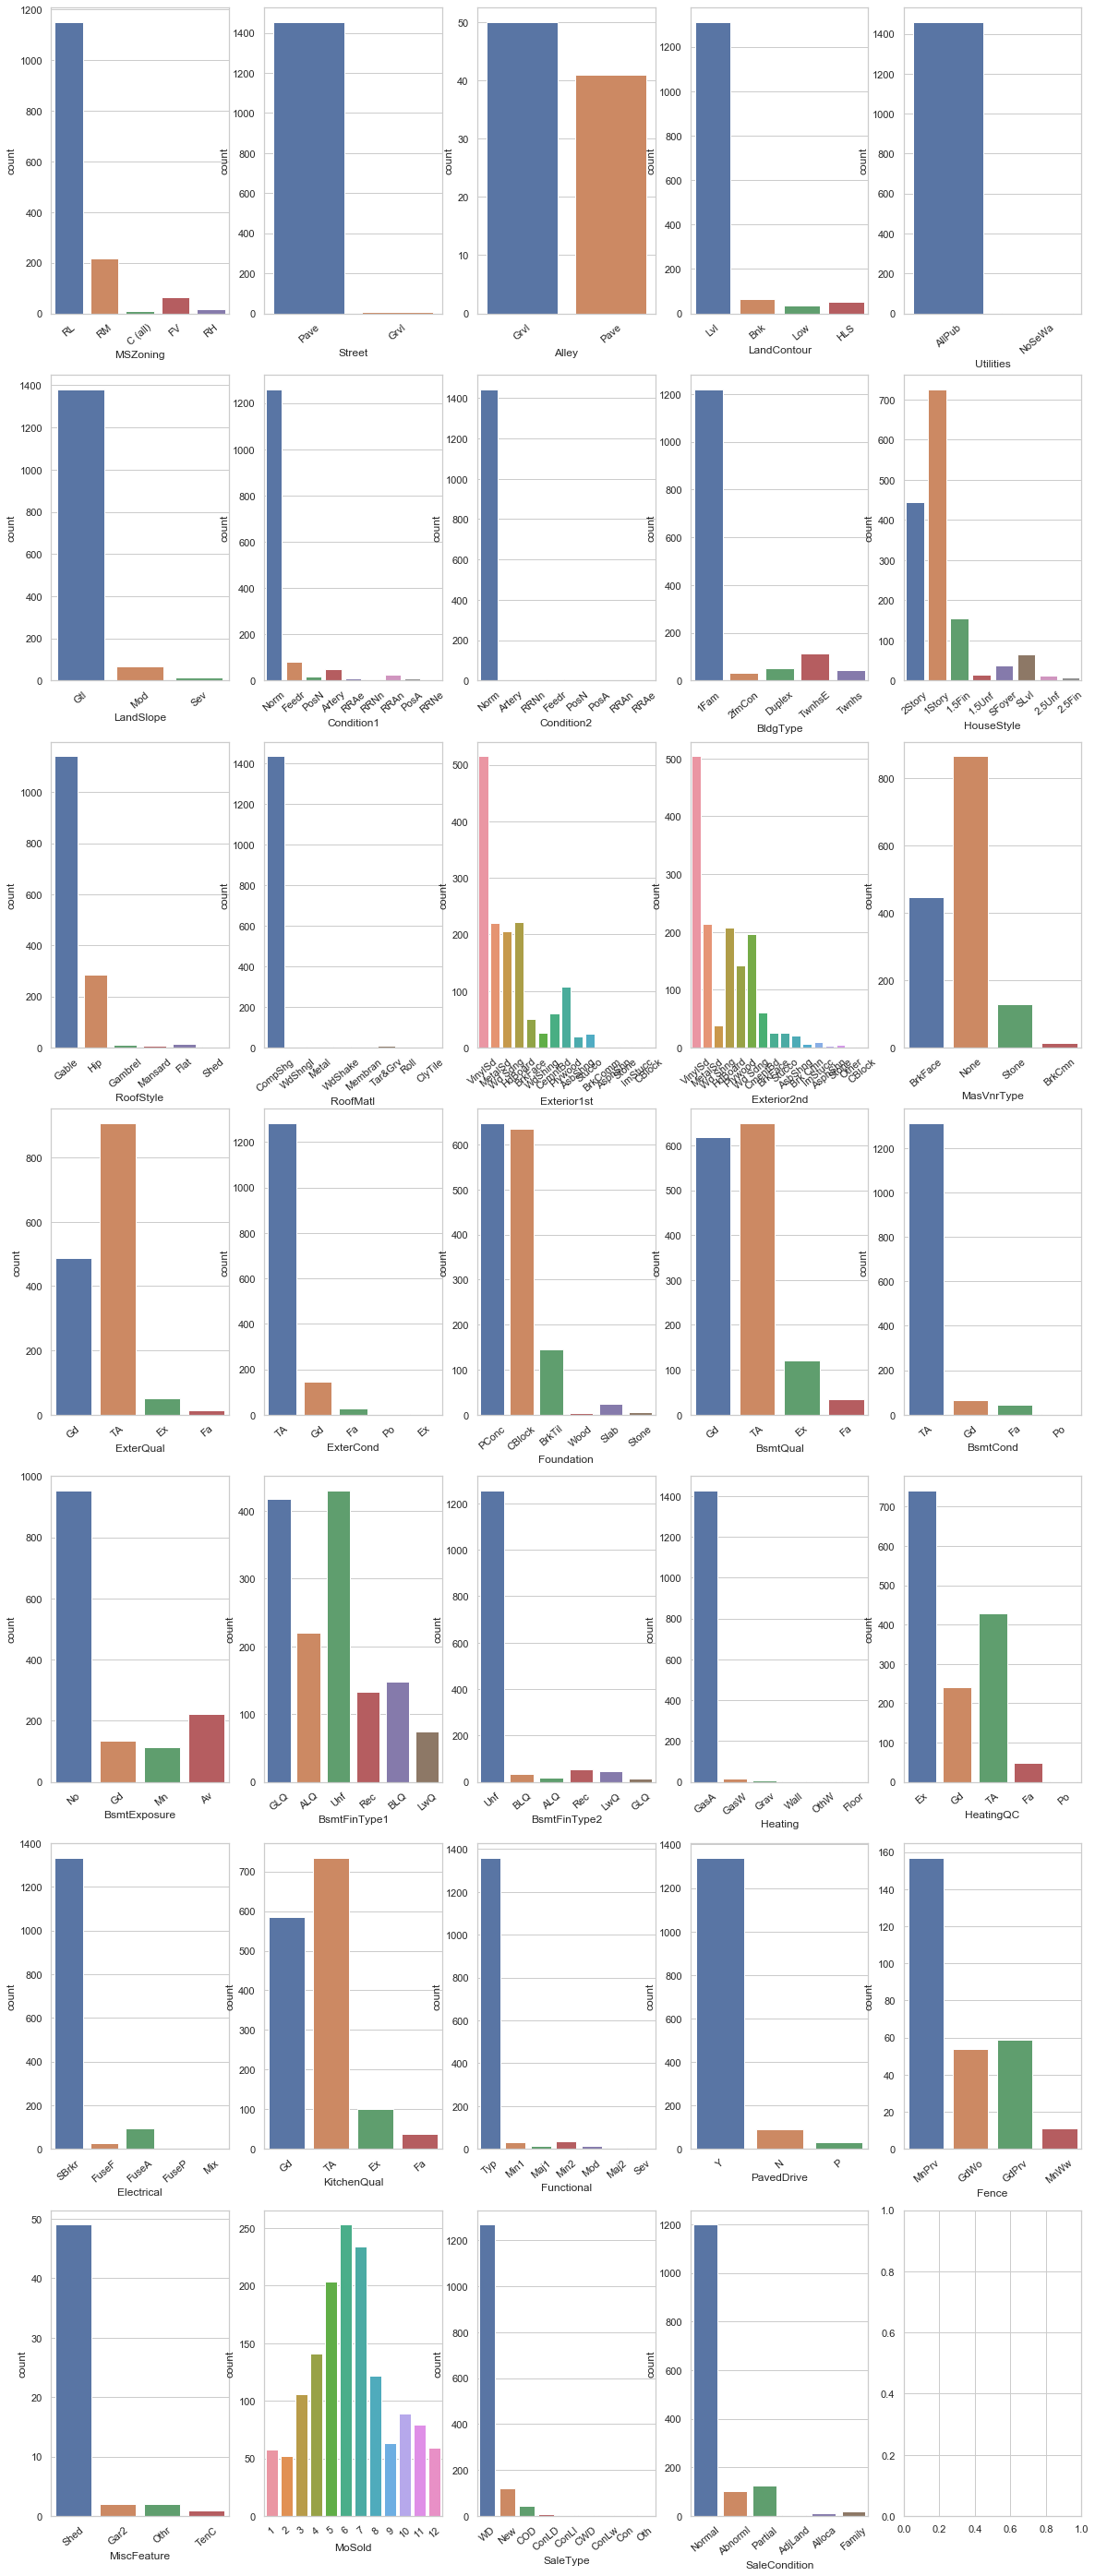

In [16]:
# Countplots of the categorical features from the list of non-critical factors
fig, ax = plt.subplots(7, 5, figsize=(20, 50))
for col, subplot in zip(cat_unimp_cols, ax.flatten()):
    sns.countplot(train[col], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(40)

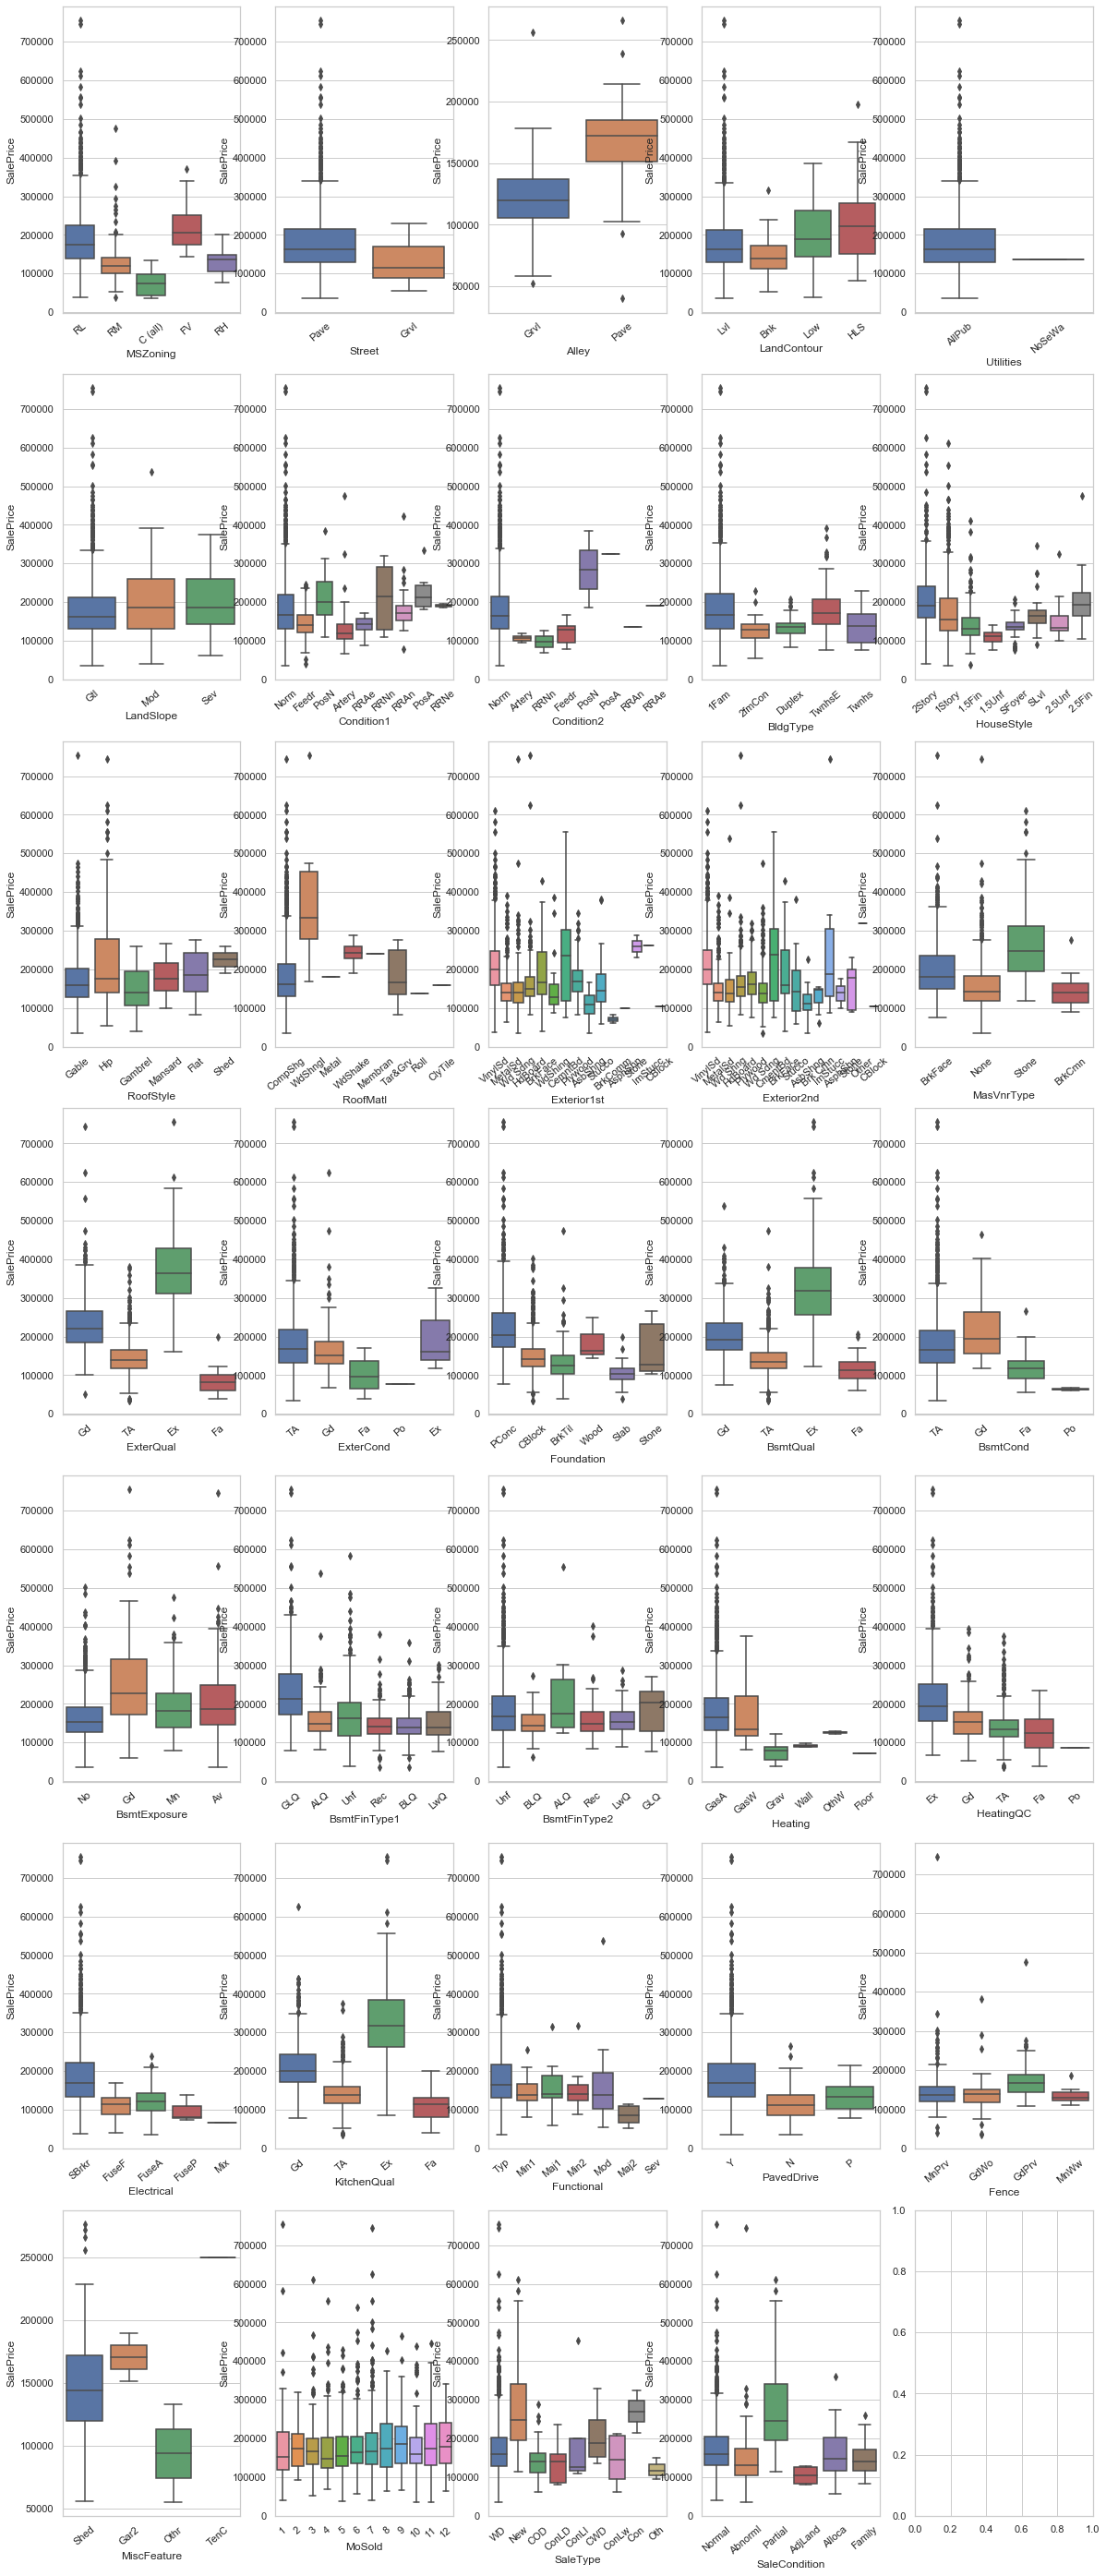

In [17]:
# Boxplots of the categorical features from the list of non-critical factors
fig, ax = plt.subplots(7, 5, figsize=(20, 50))
for col, subplot in zip(cat_unimp_cols, ax.flatten()):
    sns.boxplot(data = train, x = col, y = "SalePrice", ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(40)

## Features with high correlation

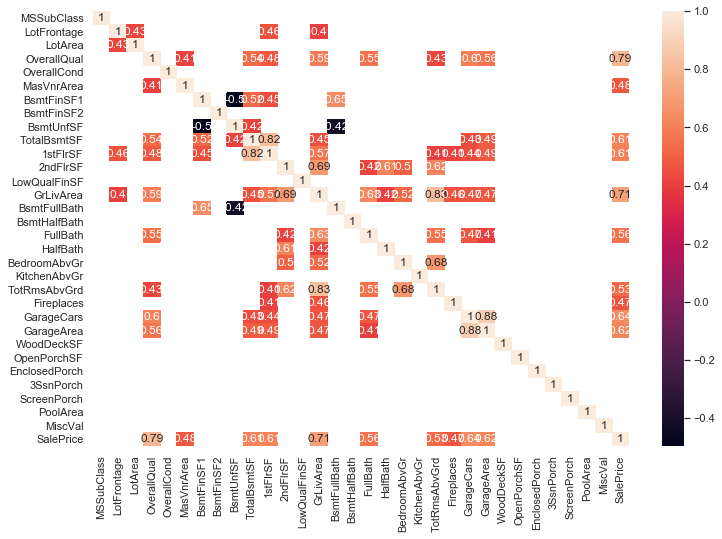

In [18]:
corr = train.corr()
sns.heatmap(corr[(corr > 0.4) | (corr < -0.4)], annot = True);

### Examine some of the features that are highly correlated with SalePrice

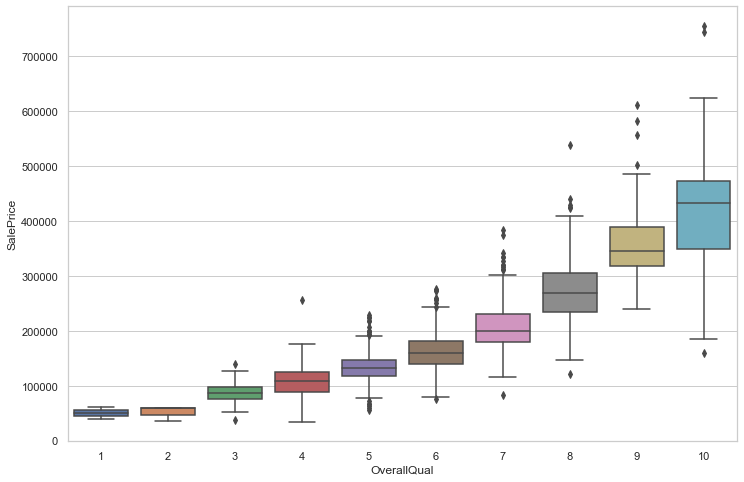

In [19]:
sns.boxplot(data = train, x = "OverallQual", y = "SalePrice");

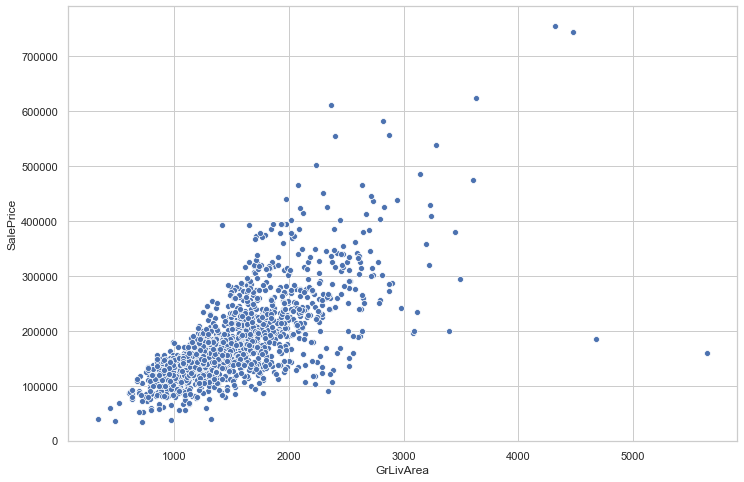

In [20]:
sns.scatterplot(data = train, x = "GrLivArea", y = "SalePrice");

### Count of missing values, which will be imputed in the feature engineering process

Text(0.5, 1.0, 'Features with Missing Values in Test set')

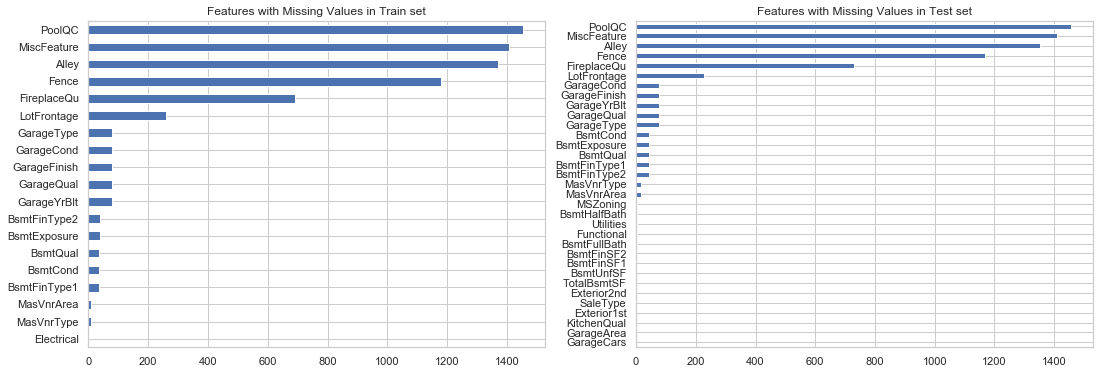

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
train_missing = pd.DataFrame(train.isna().sum().sort_values(), columns = ["Count_NaN"])
train_missing[train_missing["Count_NaN"] > 0].plot(kind= 'barh',legend = None, ax = ax[0]);
test_missing = pd.DataFrame(test.isna().sum().sort_values(), columns = ["Count_NaN"])
test_missing[test_missing["Count_NaN"] > 0].plot(kind= 'barh',legend = None, ax = ax[1]);
ax[0].set_title("Features with Missing Values in Train set")
ax[1].set_title("Features with Missing Values in Test set")

In [22]:
train_missing[train_missing["Count_NaN"] > 0].sort_values(by = "Count_NaN", ascending = False)

,Count_NaN
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageFinish,81
GarageType,81
GarageCond,81
GarageQual,81


In [23]:
test_missing[test_missing["Count_NaN"] > 0].sort_values(by = "Count_NaN", ascending = False)

,Count_NaN
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageCond,78
GarageFinish,78
GarageYrBlt,78
GarageQual,78
